In [1]:
import pandas as pd
import numpy as np  
df = pd.read_csv('index.csv')


Data Preprocessing:

In [67]:
# Check for missing values:
df.isnull().sum() 


date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [ ]:
# Check for duplicates:
df.drop_duplicates(inplace=True)


Exploratory Data Analysis (EDA):

In [ ]:
# View basic statistics:
df.describe() 


,money
count,2341.000000
mean,31.816736
std,5.094530
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [ ]:
#Check the data structure:
df.info()  
df.head()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2341 non-null   object 
 1   datetime     2341 non-null   object 
 2   cash_type    2341 non-null   object 
 3   card         2252 non-null   object 
 4   money        2341 non-null   float64
 5   coffee_name  2341 non-null   object 
dtypes: float64(1), object(5)
memory usage: 109.9+ KB


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


Sales Trends Over Time:

In [ ]:
# Sales by Date:
df['total_sales'] = df['money'] 
df['date'] = pd.to_datetime(df['date'])  # Convert the 'date' column to a datetime object
sales_by_date = df.groupby(df['date'].dt.date)['total_sales'].sum()


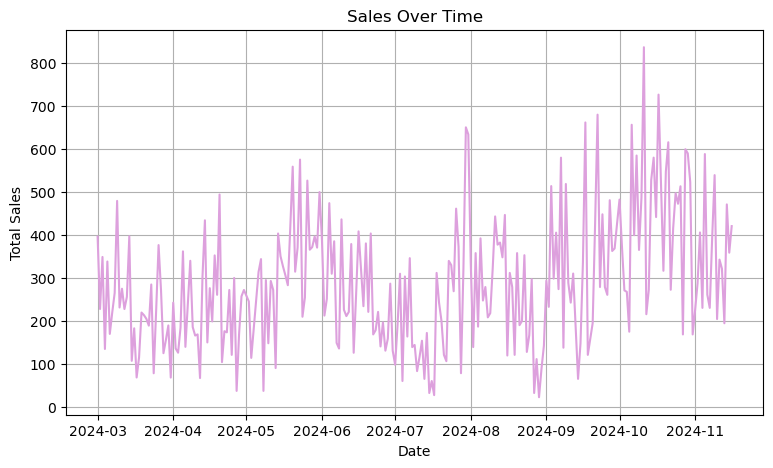

In [86]:
import matplotlib.pyplot as plt

sales_by_date.plot(kind='line', title='Sales Over Time',color='plum', figsize=(9, 5))
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


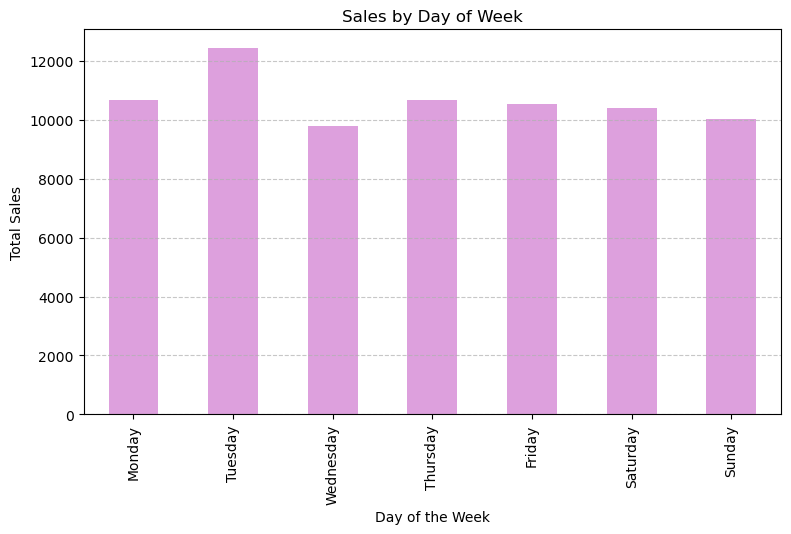

In [94]:
#Sales by Day of Week:
df['total_sales'] = df['money'] 
df['date'] = pd.to_datetime(df['date'])  

df['day_of_week'] = df['date'].dt.day_name()

sales_by_day = df.groupby('day_of_week')['total_sales'].sum()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(day_order)

sales_by_day.plot(kind='bar', title='Sales by Day of Week',  figsize=(9, 5), color='plum',)
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()





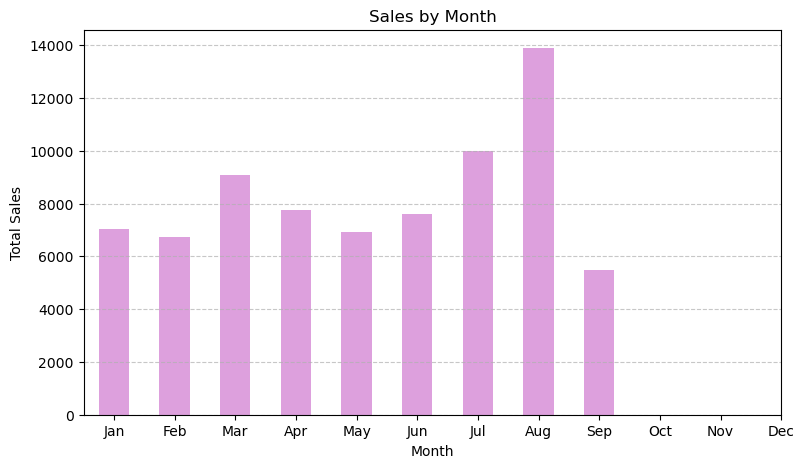

In [93]:
# Monthly Sales Trends:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].dt.month

if 'total_sales' not in df.columns:
    df['total_sales'] = df['money']  

monthly_sales = df.groupby('month')['total_sales'].sum()

monthly_sales.plot(kind='bar', title='Sales by Month', figsize=(9, 5), color='plum')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Product Performance (Coffee Sales):

<Axes: title={'center': 'Top 10 Best-Selling Coffee Products'}, xlabel='coffee_name'>

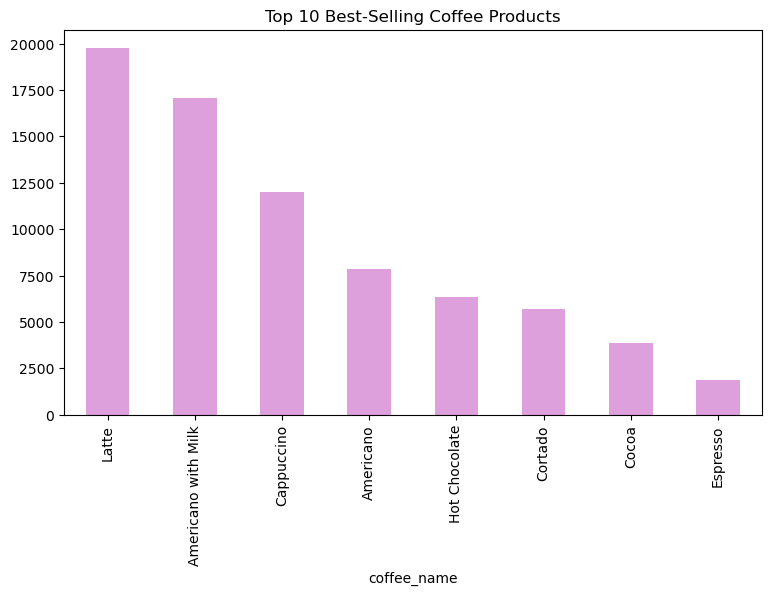

In [97]:
#Best-selling coffee products:
top_coffees = df.groupby('coffee_name')['total_sales'].sum().sort_values(ascending=False)
top_coffees.head(10).plot(kind='bar', title='Top 10 Best-Selling Coffee Products', color='plum', figsize=(9, 5))


<Axes: title={'center': 'Top 10 Coffees by Quantity Sold'}, xlabel='coffee_name'>

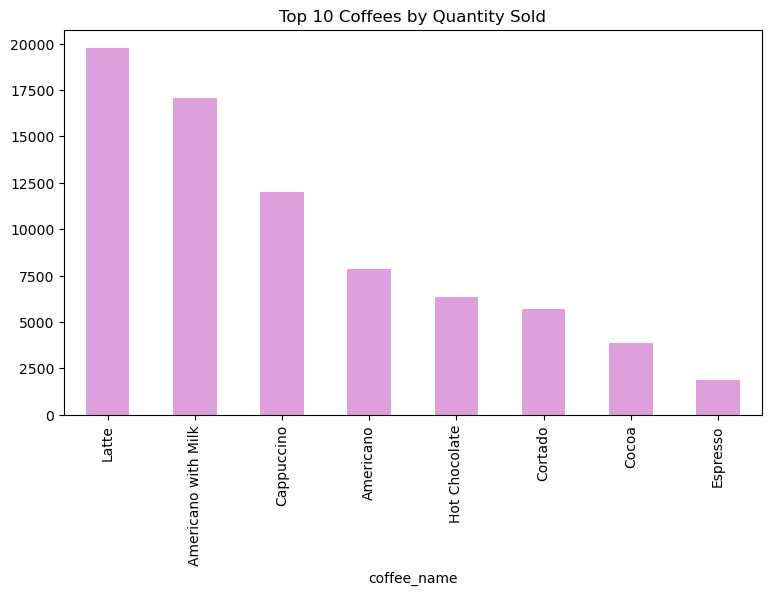

In [107]:
#Quantity sold per coffee type:
coffee_quantity = df.groupby('coffee_name')['money'].sum() 
coffee_quantity.sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Coffees by Quantity Sold', color='plum', figsize=(9, 5))


Payment Method Analysis (Cash vs Card):

<Axes: title={'center': 'Sales by Payment Method (Cash vs Card)'}, ylabel='total_sales'>

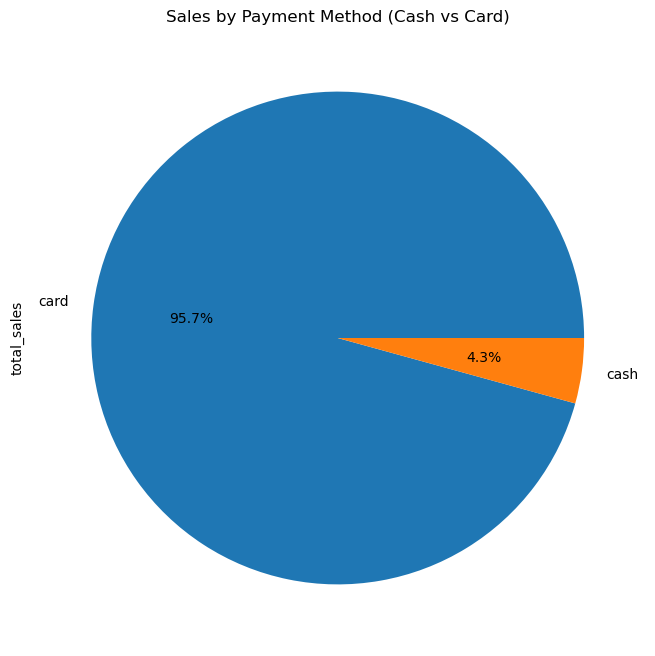

In [103]:
#Total sales by payment method (cash vs card):
payment_method_sales = df.groupby('cash_type')['total_sales'].sum()
payment_method_sales.plot(kind='pie', title='Sales by Payment Method (Cash vs Card)', figsize=(8, 8), autopct='%1.1f%%')

<Axes: title={'center': 'Sales by Cash Type (Card vs Cash)'}, xlabel='cash_type'>

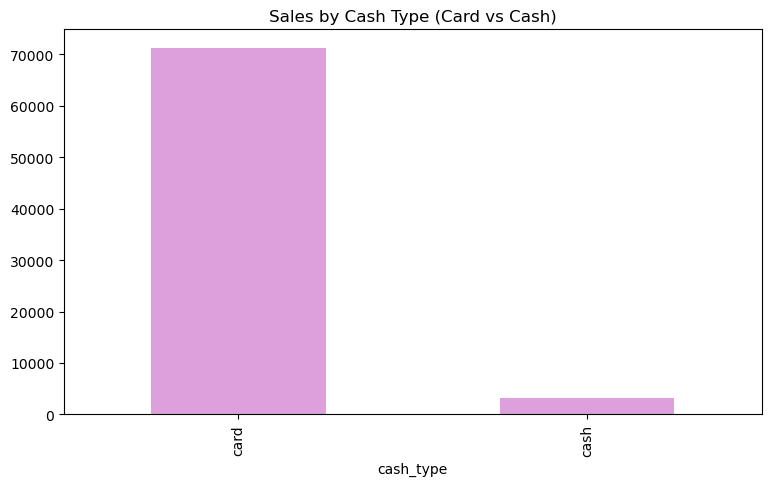

In [106]:
#Sales by card vs cash:
sales_by_cash_type = df.groupby('cash_type')['total_sales'].sum()
sales_by_cash_type.plot(kind='bar', title='Sales by Cash Type (Card vs Cash)',color='plum', figsize=(9, 5))


 Seasonal Sales Analysis:

<Axes: title={'center': 'Sales by Season'}, xlabel='season'>

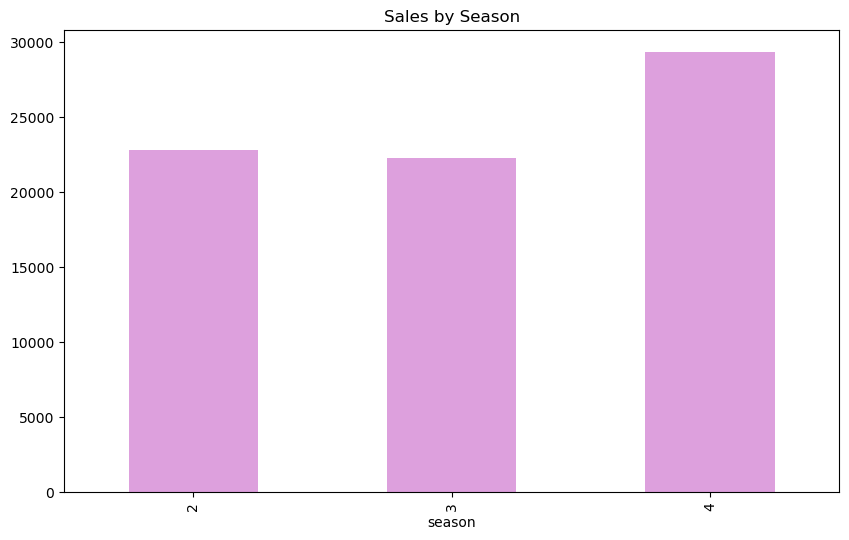

In [111]:
df['season'] = df['date'].dt.month % 12 // 3 + 1  # Assign season 1 to 4 based on month
seasonal_sales = df.groupby('season')['total_sales'].sum()
seasonal_sales.plot(kind='bar', title='Sales by Season',color='plum', figsize=(10, 6))


Correlation and Insights:

In [115]:
#Correlation between payment types (cash vs card) and total sales:
df[['money', 'total_sales']].corr()


correlation_matrix = df[['money', 'total_sales']].corr()
print(correlation_matrix)


df['card'] = pd.to_numeric(df['card'], errors='coerce') 
correlation_matrix = df[['money', 'card', 'total_sales']].corr()
print(correlation_matrix)


             money  total_sales
money          1.0          1.0
total_sales    1.0          1.0
             money  card  total_sales
money          1.0   NaN          1.0
card           NaN   NaN          NaN
total_sales    1.0   NaN          1.0


In [116]:
#Price vs sales analysis:
df['card'] = pd.to_numeric(df['card'], errors='coerce')


df['unit_price'] = df['total_sales'] / (df['money'] + df['card']).replace(0, np.nan)
price_sales_corr = df[['unit_price', 'total_sales']].corr()
print(price_sales_corr)


df['unit_price'] = df['total_sales'] / df['money'].replace(0, np.nan)



             unit_price  total_sales
unit_price          NaN          NaN
total_sales         NaN          1.0


Advanced Visualizations:

<Axes: title={'center': 'Sales Over Time (with markers)'}, xlabel='date'>

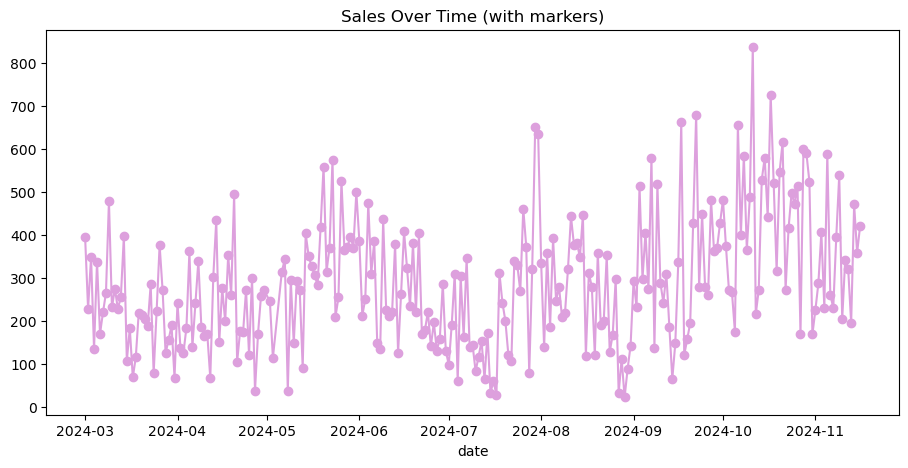

In [120]:
#Sales Over Time (line chart with markers):
sales_by_date.plot(kind='line', marker='o', color='plum', title='Sales Over Time (with markers)', figsize=(11, 5))
